In [71]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [73]:
#read the data in and check it
data = pd.read_csv("E2_data_G76019643_cabusora.csv")
data

,y,x
0,0.476435,5.847768
1,-0.225693,1.761986
2,-1.716057,13.096499
3,-2.439832,15.907617
4,-0.828951,0.465577
...,...,...
9995,0.788241,2.987047
9996,-0.151049,3.464787
9997,-0.323924,8.825551
9998,0.235135,9.889732


In [75]:
#1 split the data into two halves
estimation_data = data[:len(data)//2].copy()
testing_data = data[len(data)//2:].copy()

# Sort estimation data in ascending order so that the line doesn't scramble
estimation_data.sort_values(by='x', ascending=True, inplace=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     868.9
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:19:20   Log-Likelihood:                -4975.3
No. Observations:                5000   AIC:                             9963.
Df Residuals:                    4994   BIC:                         1.000e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

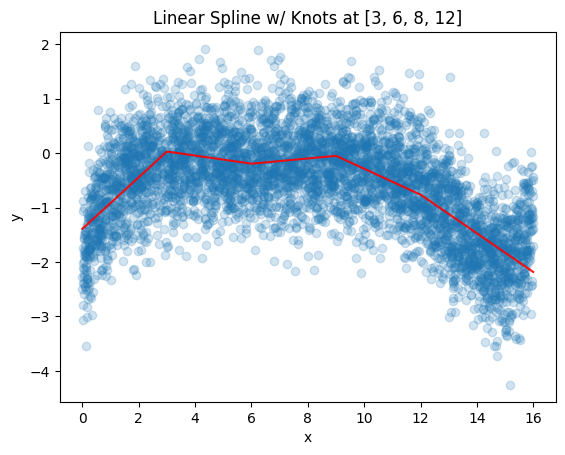

In [77]:
#2 estimate linear spline at knots = {3,6,9,12}
linear_model = smf.ols(formula='y ~ x + I((x - 3) * (x > 3)) + I((x - 6) * (x > 6)) + I((x - 9) * (x > 9)) + I((x - 12) * (x > 12))', data=estimation_data)
linear_model_reg = linear_model.fit()

# Get summary of model
print(linear_model_reg.summary())

#3 plot the line
# Add x and y labels
plt.xlabel('x')  # Label for x-axis
plt.ylabel('y')  # Label for y-axis
plt.title('Linear Spline w/ Knots at [3, 6, 8, 12]') # Add title

# Plot the actual data points
plt.plot(estimation_data.x, estimation_data.y, 'o', alpha=0.2, zorder=0)
# Plot linear model
plt.plot(estimation_data.x, linear_model_reg.predict(estimation_data), 'r-', alpha=0.9)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     719.6
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:19:22   Log-Likelihood:                -4796.0
No. Observations:                5000   AIC:                             9608.
Df Residuals:                    4992   BIC:                             9660.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

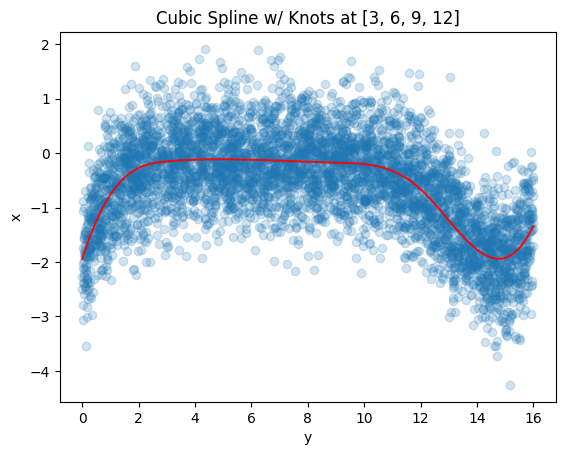

In [79]:
#2 estimate cubic spline at knots = {3,6,9,12}
cubic_model = smf.ols(formula='y ~ I(x**3) + I(x**2) + x + I(((x - 3) * (x > 3))**3) + I(((x - 6) * (x > 6))**3) + I(((x - 9) * (x > 9))**3) + I(((x - 12) * (x > 12))**3)', data=estimation_data)
cubic_model_reg = cubic_model.fit()

# Get summary of model
print(cubic_model_reg.summary())

#3 plot the data
# Add x and y labels
plt.xlabel('y')  # Label for x-axis
plt.ylabel('x')  # Label for y-axis
plt.title('Cubic Spline w/ Knots at [3, 6, 9, 12]') # Add title

# Plot the actual data points
plt.plot(estimation_data.x, estimation_data.y, 'o', alpha=0.2, zorder=0)
# Plot piecewise linear model
plt.plot(estimation_data.x, cubic_model_reg.predict(estimation_data), 'r-', alpha=0.9)

In [87]:
#2 estimate natural cubic spline at knots = {3,6,9,12}
natural_model = smf.ols(formula='y ~ I(log(x)) + I(log(3)) + x + I(log((x - 3) * (x > 3))) + I(log((x - 6) * (x > 6))) + I(log((x - 9) * (x > 9))) + I(log((x - 12) * (x > 12)))', data=estimation_data)
natural_model_reg = natural_model.fit()

# Get summary of model
print(natural_model_reg.summary())

#3 plot the data
# Add x and y labels
plt.xlabel('y')  # Label for x-axis
plt.ylabel('x')  # Label for y-axis
plt.title('Natural Cubic Model w/ Knots at [3, 6, 9, 12]') # Add title

# Plot the actual data points
plt.plot(estimation_data.x, estimation_data.y, 'o', alpha=0.2, zorder=0)
# Plot piecewise linear model
plt.plot(estimation_data.x, natural_model_reg.predict(estimation_data), 'r-', alpha=0.9)

PatsyError: Error evaluating factor: NameError: name 'log' is not defined
    y ~ I(log(x)) + I(log(3)) + x + I(log((x - 3) * (x > 3))) + I(log((x - 6) * (x > 6))) + I(log((x - 9) * (x > 9))) + I(log((x - 12) * (x > 12)))
                    ^^^^^^^^^

In [82]:
#4 calculate MSE
#linear MSE
#predict
linear_predict  = linear_model_reg.predict(testing_data)
#calculate
linear_squared_difference = (linear_predict - testing_data['y']) ** 2
linear_MSE = np.mean(linear_squared_difference)
#print
print(f'Linear MSE: {linear_MSE}, R2: {linear_model_reg.rsquared}')

#cubic MSE 
#predict
cubic_predict  = cubic_model_reg.predict(testing_data)
#calculate
cubic_squared_difference = (cubic_predict - testing_data['y']) ** 2
cubic_MSE = np.mean(cubic_squared_difference)
#print
print(f'Cubic MSE: {cubic_MSE}, R2: {cubic_model_reg.rsquared}')


Linear MSE: 0.4419944350354428, R2: 0.46523048554359403
Cubic MSE: 0.41314379590151196, R2: 0.502245229917162


In [84]:
#Out of the MSE and R values that were calculated, the cubic model is recommended for accuracy since the MSE is smallest.
#The cubic model also has the higher R2 value, so it would also be good for explaining the points of change in the fitted line.